test_clas1 : 分類問題

In [1]:
#　colaboraory用: Google drive をマウントする
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# colaboratory用: フォルダを移る
%cd "drive/My Drive/Colab Notebooks/"

/content/drive/My Drive/Colab Notebooks


フォルダは自分の指定のものに変更して下さい。

In [3]:
%cd "ctorch211122/MiniCTorch_Prototype/notebook"

/content/drive/My Drive/Colab Notebooks/ctorch211122/MiniCTorch_Prototype/notebook


ライブラリのimport

In [4]:
!pip install lark-parser

In [5]:
import sys
sys.path.append("../")

import json
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import minictorch.generator as GN
import minictorch.converter as CV

In [6]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing   import StandardScaler

#from torch.utils.data import TensorDataset
#from torch.utils.data import DataLoader

データ読み込み

In [7]:
# データ読み込み
iris = datasets.load_iris()
data   = iris['data']
target = iris['target']

# 学習データと検証データに分割
x_train, x_valid, y_train, y_valid = train_test_split( data, target, shuffle=True )

# 特徴量の標準化
scaler = StandardScaler()
scaler.fit( x_train )

x_train = scaler.transform(x_train)
x_valid = scaler.transform(x_valid)

# Tensor型に変換
# 学習に入れるときはfloat型 or long型になっている必要があるのここで変換してしまう
x  = torch.from_numpy(x_train).float()
y  = torch.from_numpy(y_train).long()
vx = torch.from_numpy(x_valid).float()
vy = torch.from_numpy(y_valid).long()

#print('x_train : ', x_train.shape)
#print('y_train : ', y_train.shape)
#print('x_valid : ', x_valid.shape)
#print('y_valid : ', y_valid.shape)

DataSetとDataLoaderの生成

In [ ]:
"""
train_dataset = TensorDataset(x, y)
valid_dataset = TensorDataset(vx, vy)

# indexを指定すればデータを取り出すことができます。
index = 0
print( train_dataset.__getitem__(index)[0].size() )
print( train_dataset.__getitem__(index)[1] )


batch_size = 112
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
valid_dataloader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=False)

# 動作確認
# こんな感じでバッチ単位で取り出す子ができます。
# イテレータに変換
batch_iterator = iter(train_dataloader)

# 1番目の要素を取り出す
inputs, labels = next(batch_iterator)
"""

トレーニング用のデータを生成する

In [8]:
batch_size = 64
print(x.shape)
print(y.shape)
inputs = x[0:batch_size,:]
labels = y[0:batch_size]
"""
index_random = np.arange(len(x))
np.random.shuffle(index_random)
mb_index = index_random[ 0:batch_size ]
inputs = x[mb_index, :]
labels = y[mb_index]
"""

torch.Size([112, 4])
torch.Size([112])


'\nindex_random = np.arange(len(x))\nnp.random.shuffle(index_random)\nmb_index = index_random[ 0:batch_size ]\ninputs = x[mb_index, :]\nlabels = y[mb_index]\n'

ニューラルネットワークの定義

In [9]:
class Net(nn.Module):    
    def __init__(self,t):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(4, 64)
        self.fc2 = nn.Linear(64, 3)
        self.target = t
    
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        self.out = x

        loss = nn.CrossEntropyLoss()
        output = loss(x,self.target)
        return output
        

class Net2(nn.Module):    
    def __init__(self):
        super(Net2, self).__init__()
        self.fc1 = nn.Linear(4, 64)
        self.fc2 = nn.Linear(64, 3)
    
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

プロジェクト名、作業フォルダ、JSONファイル名の設定

In [10]:
project = 'clas1'
folder  = './test'
json_path = folder + '/' + project +'.json'

計算グラフをJSONファイルに出力する

In [11]:
def generate_json( json_path, input, target ):

    model = Net( target )
    model.eval()
    with torch.no_grad():
        print("[SAVE]", json_path )
        GN.generate_minictorch_file( model, input, json_path )

    return model

In [12]:
torch.manual_seed( 1 )

print("inputs",inputs)
print("target",labels)
inputs.requires_grad = True

model = generate_json( json_path, inputs, labels )

inputs tensor([[-0.5097, -0.1798,  0.4691,  0.4594],
        [ 0.3281, -0.6224,  0.1848,  0.1935],
        [ 1.7642, -0.4011,  1.4927,  0.8583],
        [ 0.8068, -0.6224,  0.5260,  0.4594],
        [-0.5097,  1.8118, -1.1231, -1.0031],
        [ 1.2855,  0.0415,  0.6966,  0.4594],
        [ 1.6445,  0.2628,  1.3221,  0.8583],
        [ 1.8839, -0.6224,  1.3790,  0.9912],
        [ 0.2084,  0.7054,  0.4691,  0.5924],
        [ 0.5674, -1.2863,  0.7535,  0.9912],
        [ 0.2084, -0.1798,  0.6397,  0.8583],
        [ 0.3281, -1.0650,  1.0946,  0.3265],
        [-0.9884,  0.7054, -1.2368, -1.2690],
        [ 0.8068, -0.1798,  1.2084,  1.3901],
        [-0.1507, -0.1798,  0.2985,  0.0605],
        [-0.7491, -0.8437,  0.1279,  0.3265],
        [ 0.3281, -0.6224,  0.5829,  0.0605],
        [-1.4671,  0.2628, -1.2937, -1.2690],
        [-1.4671,  0.0415, -1.2368, -1.2690],
        [ 0.4477, -1.9502,  0.4691,  0.4594],
        [ 1.0461,  0.0415,  0.4123,  0.3265],
        [ 0.5674, -0.4011, 

一回の順伝播、逆伝播のC++コードを生成する

In [13]:
CV.convert_cpp_code( project, folder, model, inputs, json_path )

[JSON] ./test/clas1.json
{'name': 'Net/Linear[fc1]/weight/weight.5', 'op': 'prim::GetAttr', 'in': [], 'output_id': 0, 'shape': [], 'out': [3], 'sorted_id': 1}
{'name': 'Net/Linear[fc1]/bias/bias.5', 'op': 'prim::GetAttr', 'in': [], 'output_id': 0, 'shape': [], 'out': [3], 'sorted_id': 2}
{'name': 'Net/Linear[fc2]/weight/weight', 'op': 'prim::GetAttr', 'in': [], 'output_id': 0, 'shape': [], 'out': [7], 'sorted_id': 5}
{'name': 'Net/Linear[fc2]/bias/bias', 'op': 'prim::GetAttr', 'in': [], 'output_id': 0, 'shape': [], 'out': [7], 'sorted_id': 6}
[PARAM] ./test/clas1_param.cpp
{'name': 'input/x', 'op': 'IO Node', 'in': [], 'output_id': 0, 'shape': [64, 4], 'out': [3], 'sorted_id': 0}
{'name': 'Net/Linear[fc1]/weight/weight.5', 'op': 'prim::GetAttr', 'in': [], 'output_id': 0, 'shape': [], 'out': [3], 'sorted_id': 1}
Net/Linear[fc1]/weight/weight.5  ->  fc1_weight
{'name': 'Net/Linear[fc1]/bias/bias.5', 'op': 'prim::GetAttr', 'in': [], 'output_id': 0, 'shape': [], 'out': [3], 'sorted_id': 2}

In [14]:
# check code
with torch.set_grad_enabled(True):
  
  output = model( inputs )
  print("output",output)

  model.zero_grad()
  output.backward()
  print("input grad",inputs.grad)

  # ラベルを予測
  preds = torch.argmax( model.out, dim=1 )

  # イテレーション結果の計算
  epoch_loss = output * inputs.size(0)

  # 正解数の合計を更新
  epoch_corrects = torch.sum( preds == labels.data )

  epoch_loss = epoch_loss / float(inputs.size(0))
  epoch_acc  = epoch_corrects.double() / float(inputs.size(0))

  epoch=1
  print('Train Loss {}: {:.4f} Acc: {:.4f}'.format( epoch, epoch_loss, epoch_acc ))

output tensor(1.1609, grad_fn=<NllLossBackward0>)
input grad tensor([[ 1.3546e-03, -2.1930e-03,  1.5843e-03, -1.0399e-03],
        [-7.9703e-04, -5.3277e-04,  4.1739e-04, -1.7994e-03],
        [ 2.0508e-03,  1.9107e-03, -8.4889e-04,  9.9363e-04],
        [-8.5658e-04, -1.6479e-04, -7.3868e-04, -1.8232e-03],
        [-2.4854e-03,  5.1344e-04,  6.3791e-04,  6.0572e-04],
        [-1.2654e-03, -3.7569e-04, -7.1545e-04, -1.3170e-03],
        [ 2.5440e-03,  1.6395e-03, -4.7417e-04, -3.6844e-05],
        [ 2.4520e-03,  1.4094e-03, -1.3916e-03,  1.0272e-03],
        [ 1.4143e-03, -1.8425e-03, -1.3500e-03, -1.3201e-03],
        [ 2.0275e-03,  1.2053e-03, -1.7382e-03,  1.2837e-03],
        [ 1.4620e-03,  1.6903e-03, -1.8160e-03,  1.5107e-03],
        [ 1.9880e-03,  8.1345e-04, -1.6169e-03,  9.3686e-04],
        [-2.3876e-03, -1.0538e-03,  5.9390e-04, -5.4881e-04],
        [ 7.8936e-04,  2.5833e-03, -6.4120e-04,  1.3749e-03],
        [ 1.4955e-03, -2.2575e-03,  1.1000e-03, -1.4406e-03],
        [

C++コードをコンパイルする

In [15]:
!g++ -std=c++14 ./test/clas1.cpp ./test/clas1_param.cpp -D_NOTEBOOK -I ../../../xtensor -lcblas -o ./test/clas1

(注) xtensorフォルダにxtensor関連のincludeファイルを置いています。各自の環境に合わせて変更して下さい。

In [16]:
!./test/clas1

### forward computation ...
 1.160948
### backward computation ...
input_grad{{ 0.001355, -0.002193,  0.001584, -0.00104 },
 {-0.000797, -0.000533,  0.000417, -0.001799},
 { 0.002051,  0.001911, -0.000849,  0.000994},
 {-0.000857, -0.000165, -0.000739, -0.001823},
 {-0.002485,  0.000513,  0.000638,  0.000606},
 {-0.001265, -0.000376, -0.000715, -0.001317},
 { 0.002544,  0.001639, -0.000474, -0.000037},
 { 0.002452,  0.001409, -0.001392,  0.001027},
 { 0.001414, -0.001842, -0.00135 , -0.00132 },
 { 0.002028,  0.001205, -0.001738,  0.001284},
 { 0.001462,  0.00169 , -0.001816,  0.001511},
 { 0.001988,  0.000813, -0.001617,  0.000937},
 {-0.002388, -0.001054,  0.000594, -0.000549},
 { 0.000789,  0.002583, -0.000641,  0.001375},
 { 0.001495, -0.002258,  0.0011  , -0.001441},
 { 0.001849, -0.000513,  0.002239, -0.000111},
 {-0.001645,  0.00001 , -0.000228, -0.002805},
 {-0.002303, -0.00078 ,  0.000696, -0.000808},
 {-0.00228 , -0.00081 ,  0.000726, -0.000807},
 {-0.000849,  0.001411, -0.000

学習の実行(python版)

In [17]:
torch.manual_seed( 1 )

inputs.requires_grad = True

model = Net( labels )
#model = Net2()

num = inputs.size(0)

opt = torch.optim.SGD( model.parameters(), lr=0.01 )

num_epochs = 200

epoch_loss = []
epoch_acc = []

for epoch in range(num_epochs):
  with torch.set_grad_enabled(True):

    model.train()   # モデルを訓練モードに設定
    loss = model( inputs )

    #loss = criterion( outputs, labels )
    #print("loss ",epoch, " - ",loss)

    # ラベルを予測
    preds = torch.argmax( model.out, dim=1 )

    opt.zero_grad()
    loss.backward()
    opt.step()

    # 正解数の合計を更新
    epoch_corrects = torch.sum( preds == labels )
    acc  = epoch_corrects.double() / float(num)
    print('Train Loss {}: {:.4f} Acc: {:.4f} {}'.format( epoch, loss, acc, epoch_corrects ))

    epoch_loss.append( loss )
    epoch_acc.append( acc )

Train Loss 0: 1.1609 Acc: 0.1719 11
Train Loss 1: 1.1358 Acc: 0.1562 10
Train Loss 2: 1.1117 Acc: 0.1562 10
Train Loss 3: 1.0885 Acc: 0.2031 13
Train Loss 4: 1.0664 Acc: 0.2031 13
Train Loss 5: 1.0452 Acc: 0.1875 12
Train Loss 6: 1.0249 Acc: 0.2188 14
Train Loss 7: 1.0054 Acc: 0.2344 15
Train Loss 8: 0.9868 Acc: 0.2812 18
Train Loss 9: 0.9691 Acc: 0.3594 23
Train Loss 10: 0.9521 Acc: 0.4062 26
Train Loss 11: 0.9359 Acc: 0.5000 32
Train Loss 12: 0.9203 Acc: 0.5000 32
Train Loss 13: 0.9055 Acc: 0.5938 38
Train Loss 14: 0.8913 Acc: 0.6406 41
Train Loss 15: 0.8777 Acc: 0.6406 41
Train Loss 16: 0.8647 Acc: 0.6406 41
Train Loss 17: 0.8523 Acc: 0.6406 41
Train Loss 18: 0.8404 Acc: 0.6562 42
Train Loss 19: 0.8290 Acc: 0.6562 42
Train Loss 20: 0.8181 Acc: 0.6562 42
Train Loss 21: 0.8076 Acc: 0.6719 43
Train Loss 22: 0.7976 Acc: 0.6719 43
Train Loss 23: 0.7880 Acc: 0.6719 43
Train Loss 24: 0.7787 Acc: 0.6719 43
Train Loss 25: 0.7699 Acc: 0.6719 43
Train Loss 26: 0.7614 Acc: 0.6719 43
Train Loss 

収束状況グラフを描画する

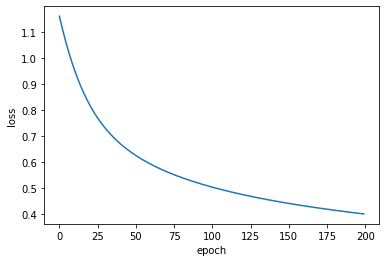

In [18]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot()
ax.plot(list(range(len(epoch_loss))), epoch_loss)
ax.set_xlabel('epoch')
ax.set_ylabel('loss')
fig.show()

正解率を描画する

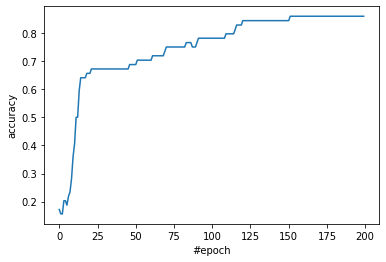

In [19]:
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(list(range(len(epoch_acc))),epoch_acc )
ax.set_xlabel('#epoch')
ax.set_ylabel('accuracy')
fig.show()

学習ループのC++コードを生成する

In [20]:
CV.convert_train_code( project, folder, json_path, sol="clas", epoch=200, batch=0 )

[JSON] ./test/clas1.json
epoch_num :  200
batch_size :  0
lr :  0.01
inp  shape :  0 
inp2 shape :  0 
target shape :  0 
pred_num :  0
div :  False
pred_pos :  -1 0 0
el  0 1  :  input/x IO Node [] 0 -1
el  3 1  :  Net/Linear[fc1]/input.1 aten::linear [0, 1, 2] 0 -1
el  4 1  :  Net/input.3 aten::relu [3] 0 -1
el  7 1  :  Net/Linear[fc2]/input aten::linear [4, 5, 6] 0 -1
el  13 1  :  Net/22 aten::cross_entropy_loss [7, 8, 9, 10, 11, 12] 0 -1
eval no : 13 -> type= 2  :  7 -1
last cmd: 13
------
solution : clas
pred_no   : 7
target_no : -1
class_no  : 8
pred_no :  7
[TRAIN]  ./test/clas1_train.cpp


学習用C++コードをコンパイル、リンクする

In [21]:
!g++ -std=c++14 ./test/clas1.cpp ./test/clas1_param.cpp ./test/clas1_train.cpp -D_NOTEBOOK -D_TRAIN -I ../../../xtensor -lcblas -o ./test/clas1_train

In [22]:
!./test/clas1_train

epoch_num : 200
epoch 0 - loss 1.16095 - accuracy 0.171875
epoch 1 - loss 1.13579 - accuracy 0.15625
epoch 2 - loss 1.11166 - accuracy 0.15625
epoch 3 - loss 1.08853 - accuracy 0.203125
epoch 4 - loss 1.06637 - accuracy 0.203125
epoch 5 - loss 1.04515 - accuracy 0.1875
epoch 6 - loss 1.02485 - accuracy 0.21875
epoch 7 - loss 1.00543 - accuracy 0.234375
epoch 8 - loss 0.986847 - accuracy 0.28125
epoch 9 - loss 0.96908 - accuracy 0.359375
epoch 10 - loss 0.952092 - accuracy 0.40625
epoch 11 - loss 0.935852 - accuracy 0.5
epoch 12 - loss 0.920323 - accuracy 0.5
epoch 13 - loss 0.905476 - accuracy 0.59375
epoch 14 - loss 0.891279 - accuracy 0.640625
epoch 15 - loss 0.8777 - accuracy 0.640625
epoch 16 - loss 0.864709 - accuracy 0.640625
epoch 17 - loss 0.85228 - accuracy 0.640625
epoch 18 - loss 0.840382 - accuracy 0.65625
epoch 19 - loss 0.82899 - accuracy 0.65625
epoch 20 - loss 0.818077 - accuracy 0.65625
epoch 21 - loss 0.807619 - accuracy 0.671875
epoch 22 - loss 0.797591 - accuracy 0.

In [23]:
# read output file from c++ code
path = folder + '/' + project + '.out'
f = open( path, "r" )

loss = []
acc=[]

datalist = f.readlines()
for data in datalist:
  ds = data.split(',')
  loss.append( float(ds[0]) )
  acc.append( float(ds[1]) )

f.close()

print("epoch =", len(loss))
print( loss )

epoch = 200
[1.160948, 1.135788, 1.111656, 1.088526, 1.066368, 1.045154, 1.024852, 1.005427, 0.986847, 0.96908, 0.952092, 0.935852, 0.920323, 0.905476, 0.891279, 0.8777, 0.864709, 0.85228, 0.840382, 0.82899, 0.818077, 0.807619, 0.797591, 0.787974, 0.778743, 0.769878, 0.76136, 0.75317, 0.745293, 0.737711, 0.730407, 0.723369, 0.716581, 0.710031, 0.703707, 0.697598, 0.691692, 0.68598, 0.680452, 0.675098, 0.66991, 0.66488, 0.660002, 0.655266, 0.650667, 0.646197, 0.641852, 0.637625, 0.633511, 0.629506, 0.625603, 0.621799, 0.618089, 0.61447, 0.610937, 0.607488, 0.604118, 0.600825, 0.597605, 0.594456, 0.591374, 0.588358, 0.585404, 0.58251, 0.579675, 0.576895, 0.57417, 0.571496, 0.568873, 0.566298, 0.56377, 0.561288, 0.558849, 0.556452, 0.554097, 0.551781, 0.549503, 0.547263, 0.545059, 0.542889, 0.540754, 0.538652, 0.536581, 0.534542, 0.532533, 0.530554, 0.528603, 0.526681, 0.524785, 0.522917, 0.521074, 0.519256, 0.517462, 0.515692, 0.513945, 0.51222, 0.510518, 0.508837, 0.507178, 0.505539, 0.

収束状況グラフを描画する

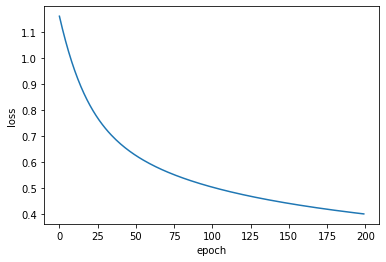

In [24]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot()
ax.plot(list(range(len(loss))), loss)
ax.set_xlabel('epoch')
ax.set_ylabel('loss')
fig.show()

正解率を描画する

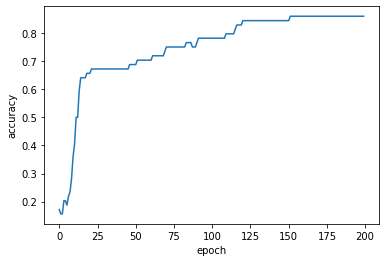

In [25]:
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(list(range(len(acc))), acc)
ax.set_xlabel('epoch')
ax.set_ylabel('accuracy')
fig.show()